### COMP 473 Group Project

#### Facial Expression Recognition: 6-Class Classification

##### Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

classes = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']

#### Training Metrics Graph
Automatically update loss and accuracy of training and validation set and display the graph as the model gets trained

In [2]:
from IPython.display import clear_output


class PlotTrain(tf.keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []

    def on_epoch_end(self, epoch, logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        #To plot the graph
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15, 5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), self.metrics[metric], label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), self.metrics['val_' + metric], label='val_' + metric)

        axs[i].legend()
        axs[i].grid()
        plt.tight_layout()
        plt.show()

### 10 Epoch runs:

In [3]:
epoch_number = 10

### code to get class names

In [4]:
def myClassType(myClass):
    return_class = []
    for i in myClass:
        if (i == 0):
            return_class += ['anger']
        if (i == 1):
            return_class += ['disgust']
        if (i == 2):
            return_class += ['fear']
        if (i == 3):
            return_class += ['happiness']
        if (i == 4):
            return_class += ['sadness']
        if (i == 5):
            return_class += ['surprise']
    return return_class

## CK_Augmented dataset one (model_aug_d1)

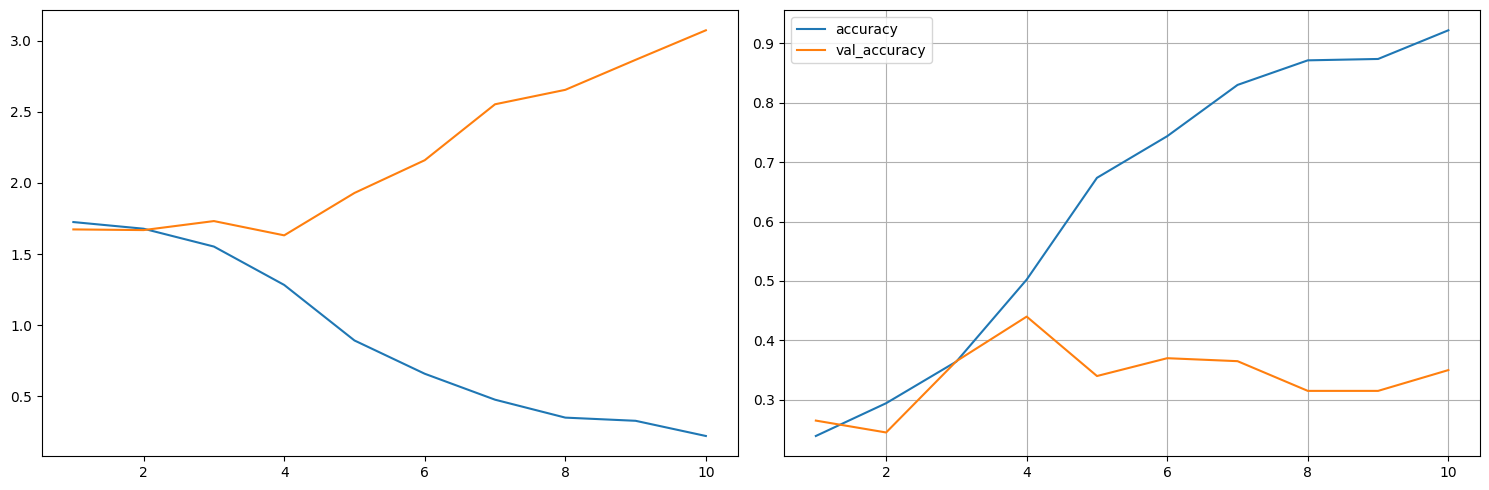

24/24 [==============================] - 4s 183ms/step
              precision    recall  f1-score   support

       anger       0.38      0.26      0.31        70
     disgust       0.47      0.52      0.50        90
        fear       0.11      0.15      0.13        40
   happiness       0.82      0.68      0.74       105
     sadness       0.48      0.29      0.36        45
    surprise       0.70      0.90      0.78       125

    accuracy                           0.56       475
   macro avg       0.49      0.47      0.47       475
weighted avg       0.56      0.56      0.55       475



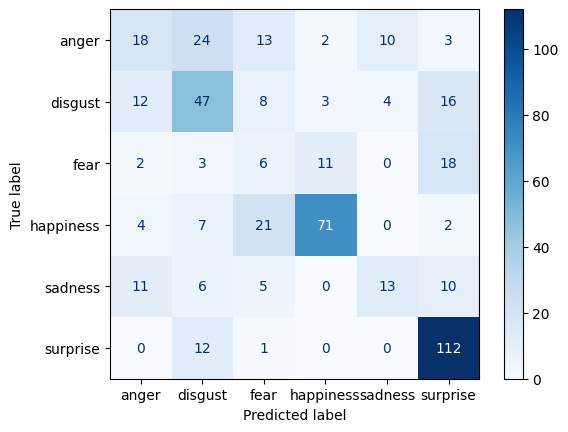

In [5]:

train_ds11 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds11 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir11 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented\TestSet'
test_generator11 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds11 = test_generator11.flow_from_directory(test_dir11, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_d1 = tf.keras.Sequential([
    #resize layer to change image into 64x64
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),

    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    # change image shape = (32, 32, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #input_shape = shape of the images made by Ryan
    #kernel size change to 5x5
    # tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    # tf.keras.layers.Resizing(28, 28),

    #After Conv2D image shape = (28, 28, 3)
    # pooling layer to change image shape = (14, 14, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    #kernel size change to 7x7
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),

    #After Conv2D image shape = (8, 8, 3)
    # pooling layer to change image shape = (4, 4, 3)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(),

    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(256, activation="relu"),

    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 6 final nodes because we have 6 classes.
    # softmax: compress resulting number between 0~1, used in category problems.
    # If you add up the probability of each class we get 1.
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_d1.summary()

callback_list = [PlotTrain()]

model_aug_d1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_d1.fit(train_ds11, validation_data=val_ds11, epochs=epoch_number, callbacks=callback_list)
model_aug_d1.save("model_aug_1.h5")

y_true11 = test_ds11.classes

# ##========================================
# true_class11 = []
# for i in y_true11:
#         if (i == 0):
#             true_class1 += ['anger']
#         if (i == 1):
#             true_class1 += ['disgust']
#         if (i == 2):
#             true_class1 += ['fear']
#         if (i == 3):
#             true_class1 += ['happiness']
#         if (i == 4):
#             true_class1 += ['sadness']
#         if (i == 5):
#             true_class1 += ['surprise']
            
# ##========================================  comment above code and uncomment below code 
true_class11 = myClassType(y_true11)
            
            


# #predict the category with the input images from the test set
y_predict11 = model_aug_d1.predict(test_ds11)
classes_x11 = np.argmax(y_predict11, axis=1)
predicted_class11 = myClassType(classes_x11)


# ##========================================
# #change the class labels to string
# predicted_class11 = []
# for i in classes_x11:
#     if (i == 0):
#         predicted_class1 += ['anger']
#     if (i == 1):
#         predicted_class1 += ['disgust']
#     if (i == 2):
#         predicted_class1 += ['fear']
#     if (i == 3):
#         predicted_class1 += ['happiness']
#     if (i == 4):
#         predicted_class1 += ['sadness']
#     if (i == 5):
#         predicted_class1 += ['surprise']
# ##======================================== comment above code and uncomment below code 


print(classification_report(true_class11, predicted_class11))
cf_model11 = confusion_matrix(true_class11, predicted_class11, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model11, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## CK_Augmented dataset two (model_aug_d2)

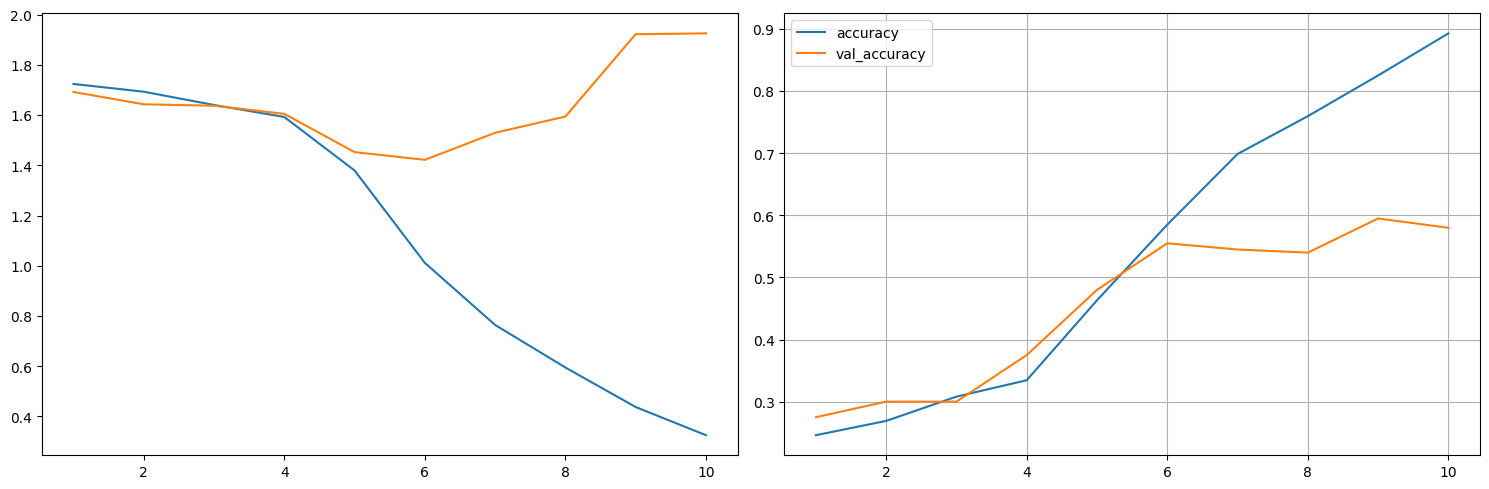

24/24 [==============================] - 5s 187ms/step
              precision    recall  f1-score   support

       anger       0.29      0.47      0.36        70
     disgust       0.38      0.44      0.41        90
        fear       0.00      0.00      0.00        40
   happiness       0.59      0.64      0.61       105
     sadness       1.00      0.07      0.12        45
    surprise       0.65      0.70      0.67       125

    accuracy                           0.48       475
   macro avg       0.49      0.39      0.36       475
weighted avg       0.51      0.48      0.46       475



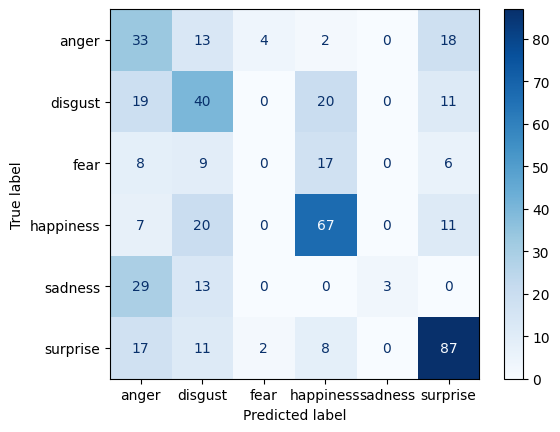

In [6]:
train_ds12 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented2\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds12 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented2\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir12 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented2\TestSet'
test_generator12 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds12 = test_generator12.flow_from_directory(test_dir12, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_d2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_d2.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_aug_d2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_d2.fit(train_ds12, validation_data=val_ds12, epochs=epoch_number, callbacks=callback_list)
model_aug_d2.save("model_aug_2.h5")

y_true12 = test_ds12.classes
true_class12 = myClassType(y_true12)

# #predict the category with the input images from the test set
y_predict12 = model_aug_d2.predict(test_ds12)
classes_x12 = np.argmax(y_predict12, axis=1)
predicted_class12 = myClassType(classes_x12)
 
print(classification_report(true_class12, predicted_class12))
cf_model12 = confusion_matrix(true_class12, predicted_class12, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model12, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [8]:
print(classification_report(true_class12, predicted_class12))

              precision    recall  f1-score   support

       anger       0.29      0.47      0.36        70
     disgust       0.38      0.44      0.41        90
        fear       0.00      0.00      0.00        40
   happiness       0.59      0.64      0.61       105
     sadness       1.00      0.07      0.12        45
    surprise       0.65      0.70      0.67       125

    accuracy                           0.48       475
   macro avg       0.49      0.39      0.36       475
weighted avg       0.51      0.48      0.46       475



## CK_Augmented dataset three (model_aug_d3)

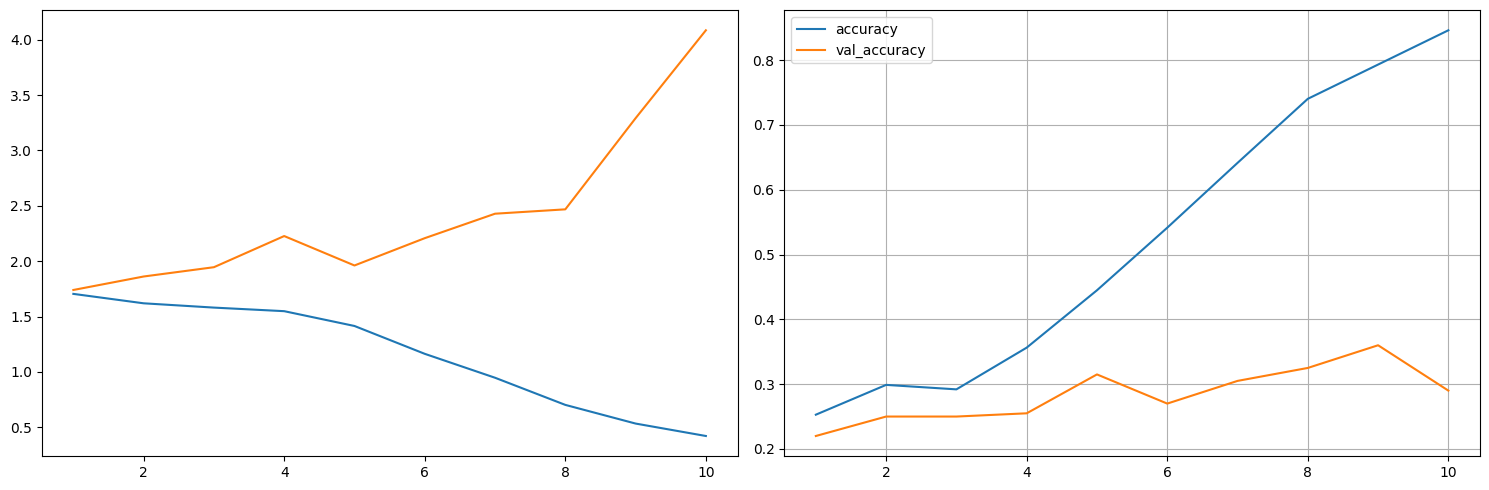

24/24 [==============================] - 5s 186ms/step
              precision    recall  f1-score   support

       anger       0.22      0.23      0.23        70
     disgust       0.44      0.53      0.48        90
        fear       0.23      0.07      0.11        40
   happiness       0.79      0.59      0.68       105
     sadness       0.37      0.44      0.40        45
    surprise       0.80      0.94      0.86       125

    accuracy                           0.56       475
   macro avg       0.48      0.47      0.46       475
weighted avg       0.56      0.56      0.55       475



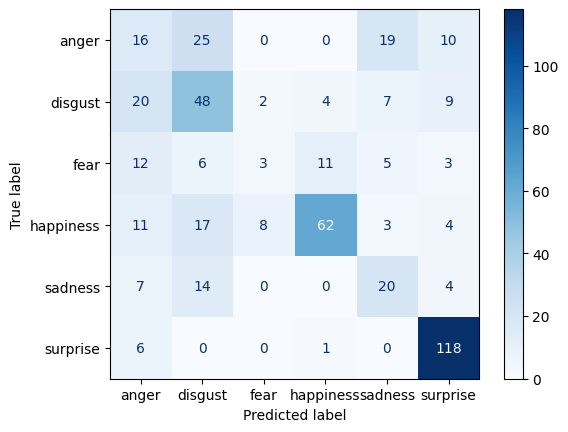

In [7]:
train_ds13 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented3\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds13 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented3\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir13 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented3\TestSet'
test_generator13 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds13 = test_generator13.flow_from_directory(test_dir13, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_d3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_d3.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_aug_d3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_d3.fit(train_ds13, validation_data=val_ds13, epochs=epoch_number, callbacks=callback_list)
model_aug_d3.save("model_aug_3.h5")

y_true13 = test_ds13.classes
true_class13 = myClassType(y_true13)

# #predict the category with the input images from the test set
y_predict13 = model_aug_d3.predict(test_ds13)
classes_x13 = np.argmax(y_predict13, axis=1)
predicted_class13 = myClassType(classes_x13)

print(classification_report(true_class13, predicted_class13))
cf_model13 = confusion_matrix(true_class13, predicted_class13, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model13, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)


## CK_Augmented_ImageCrop dataset one (model_aug_crop_d1)

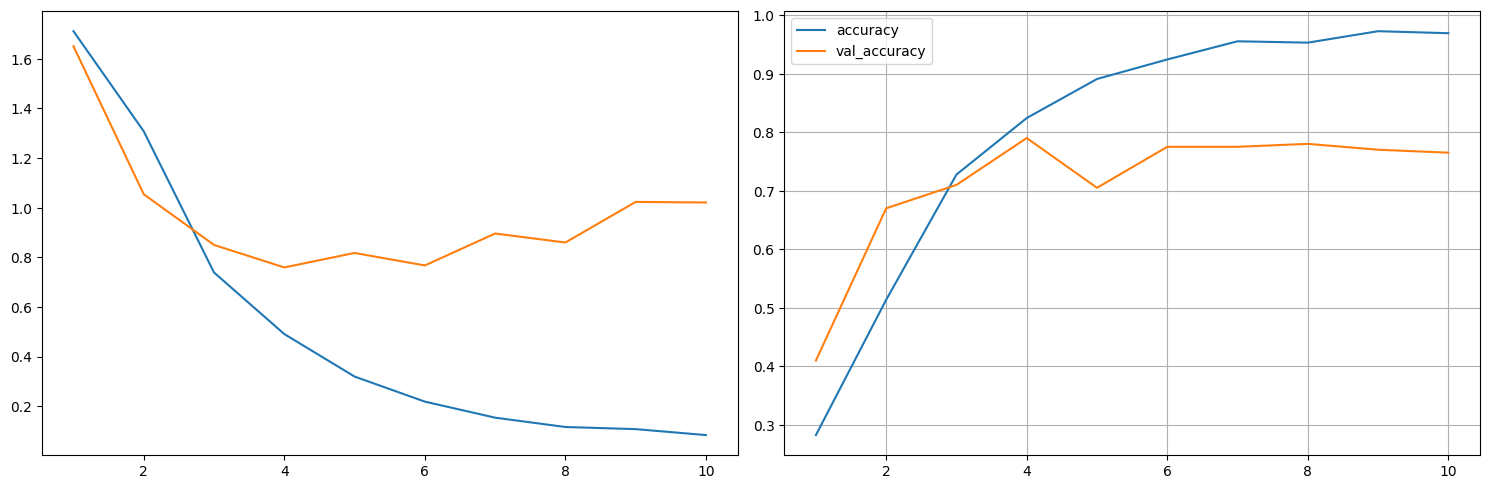

24/24 [==============================] - 3s 123ms/step
              precision    recall  f1-score   support

       anger       0.72      0.51      0.60        70
     disgust       0.99      0.78      0.87        90
        fear       0.53      0.42      0.47        40
   happiness       0.90      0.93      0.92       105
     sadness       0.45      0.87      0.59        45
    surprise       0.94      0.94      0.94       125

    accuracy                           0.80       475
   macro avg       0.75      0.74      0.73       475
weighted avg       0.83      0.80      0.80       475



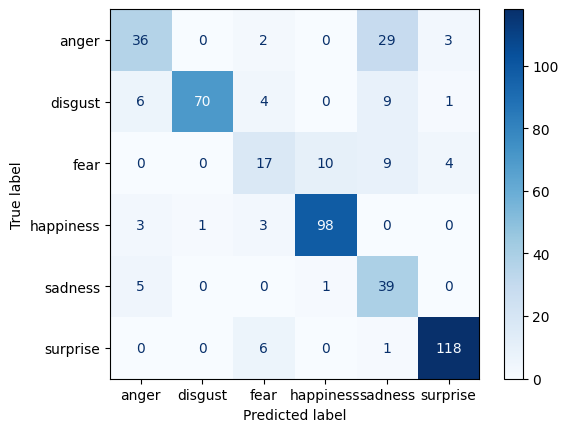

In [9]:
train_ds21 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds21 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir21 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop\TestSet'
test_generator21 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds21 = test_generator21.flow_from_directory(test_dir21, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_crop_d1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_crop_d1.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_aug_crop_d1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_crop_d1.fit(train_ds21, validation_data=val_ds21, epochs=epoch_number, callbacks=callback_list)
model_aug_crop_d1.save("model_aug_crop_1.h5")

y_true21 = test_ds21.classes
true_class21 = myClassType(y_true21)

# #predict the category with the input images from the test set
y_predict21 = model_aug_crop_d1.predict(test_ds21)
classes_x21 = np.argmax(y_predict21, axis=1)
predicted_class21 = myClassType(classes_x21)

print(classification_report(true_class21, predicted_class21))
cf_model21 = confusion_matrix(true_class21, predicted_class21, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model21, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## CK_Augmented_ImageCrop dataset two (model_aug_crop_d2)

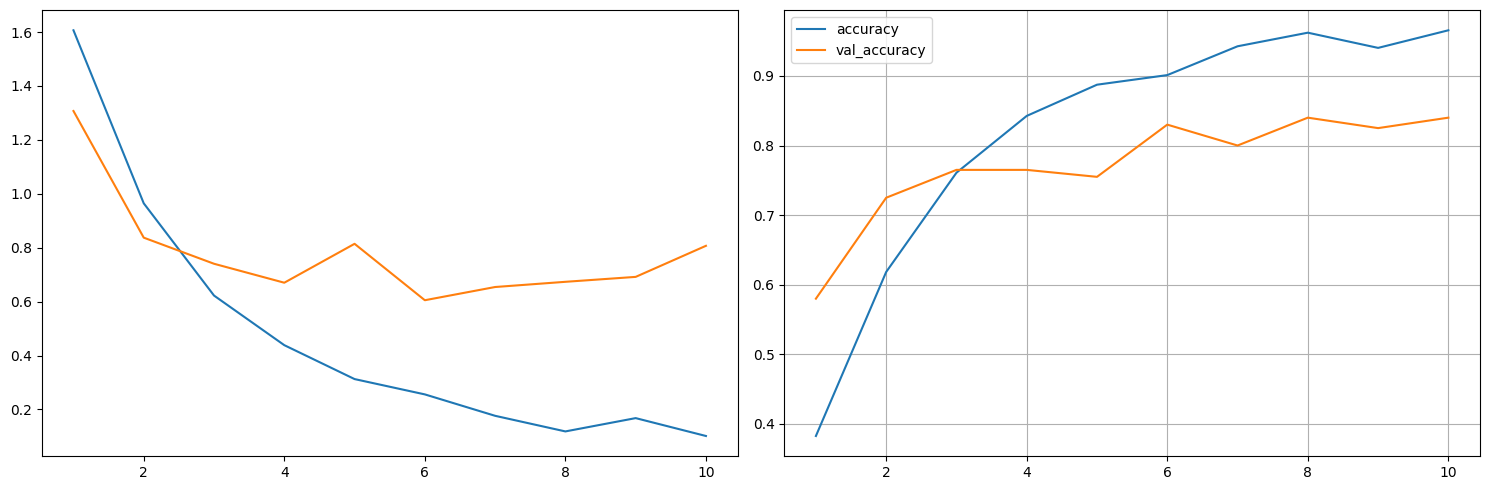

24/24 [==============================] - 3s 118ms/step
              precision    recall  f1-score   support

       anger       0.70      0.81      0.75        70
     disgust       0.83      0.88      0.85        90
        fear       0.67      0.55      0.60        40
   happiness       0.94      0.84      0.88       105
     sadness       0.67      0.64      0.66        45
    surprise       0.91      0.94      0.92       125

    accuracy                           0.83       475
   macro avg       0.79      0.78      0.78       475
weighted avg       0.83      0.83      0.82       475



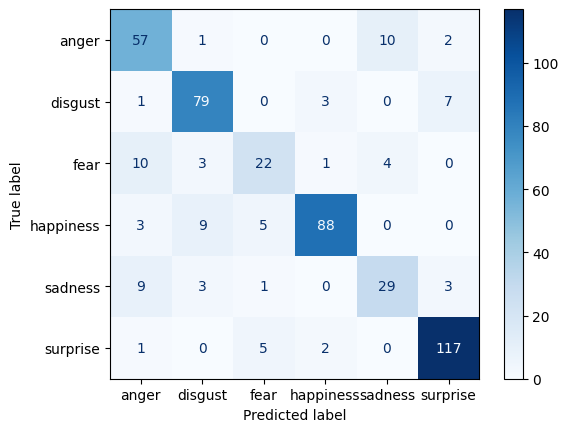

In [10]:
train_ds22 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop2\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds22 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop2\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir22 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop2\TestSet'
test_generator22 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds22 = test_generator22.flow_from_directory(test_dir22, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_crop_d2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_crop_d2.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_aug_crop_d2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_crop_d2.fit(train_ds22, validation_data=val_ds22, epochs=epoch_number, callbacks=callback_list)
model_aug_crop_d2.save("model_aug_crop_2.h5")

y_true22 = test_ds22.classes
true_class22 = myClassType(y_true22)

# #predict the category with the input images from the test set
y_predict22 = model_aug_crop_d2.predict(test_ds22)
classes_x22 = np.argmax(y_predict22, axis=1)
predicted_class22 = myClassType(classes_x22)

print(classification_report(true_class22, predicted_class22))
cf_model22 = confusion_matrix(true_class22, predicted_class22, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model22, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## CK_Augmented_ImageCrop dataset three (model_aug_crop_d3)

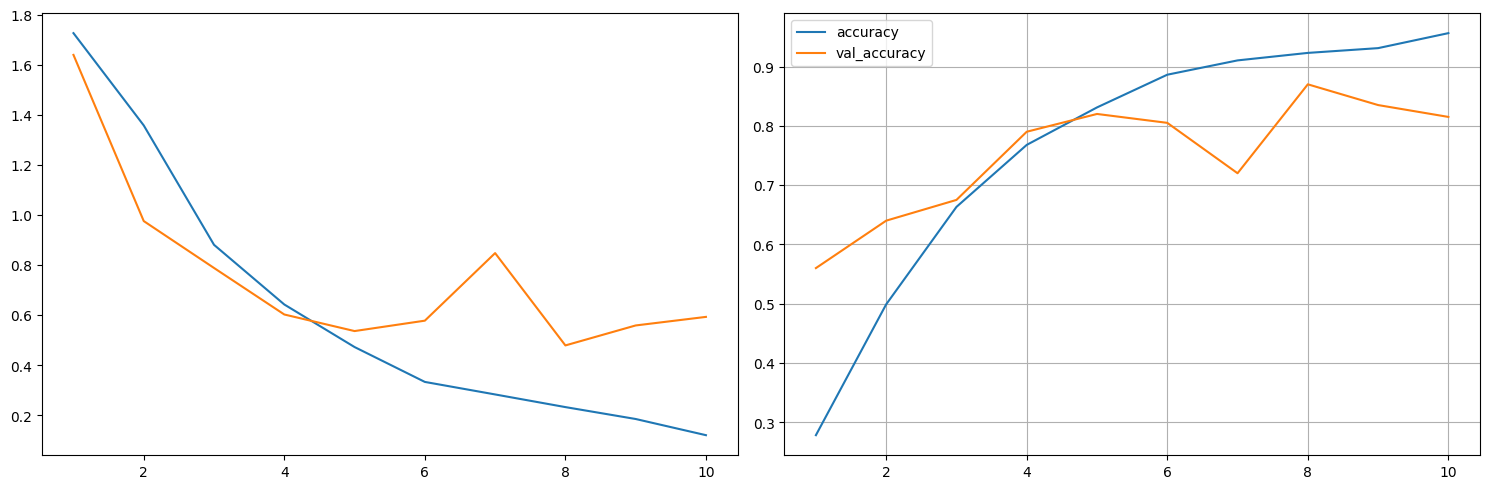

24/24 [==============================] - 3s 111ms/step
              precision    recall  f1-score   support

       anger       0.59      0.89      0.71        70
     disgust       0.91      0.86      0.88        90
        fear       0.65      0.50      0.56        40
   happiness       0.92      0.90      0.91       105
     sadness       0.75      0.40      0.52        45
    surprise       0.90      0.91      0.90       125

    accuracy                           0.81       475
   macro avg       0.79      0.74      0.75       475
weighted avg       0.82      0.81      0.81       475



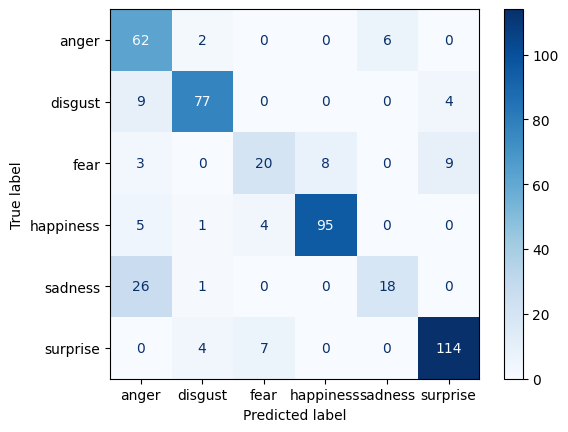

In [11]:
train_ds23 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop3\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds23 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop3\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir23 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_ImageCrop3\TestSet'
test_generator23 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds23 = test_generator23.flow_from_directory(test_dir23, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_crop_d3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_crop_d3.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_aug_crop_d3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_crop_d3.fit(train_ds23, validation_data=val_ds23, epochs=epoch_number, callbacks=callback_list)
model_aug_crop_d3.save("model_aug_crop_2.h5")

y_true23 = test_ds23.classes
true_class23 = myClassType(y_true23)

# #predict the category with the input images from the test set
y_predict23 = model_aug_crop_d3.predict(test_ds23)
classes_x23 = np.argmax(y_predict23, axis=1)
predicted_class23 = myClassType(classes_x23)

print(classification_report(true_class23, predicted_class23))
cf_model23 = confusion_matrix(true_class23, predicted_class23, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model23, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## CK_Augmented_IntensityNormalization dataset one (model_aug_int_d1)

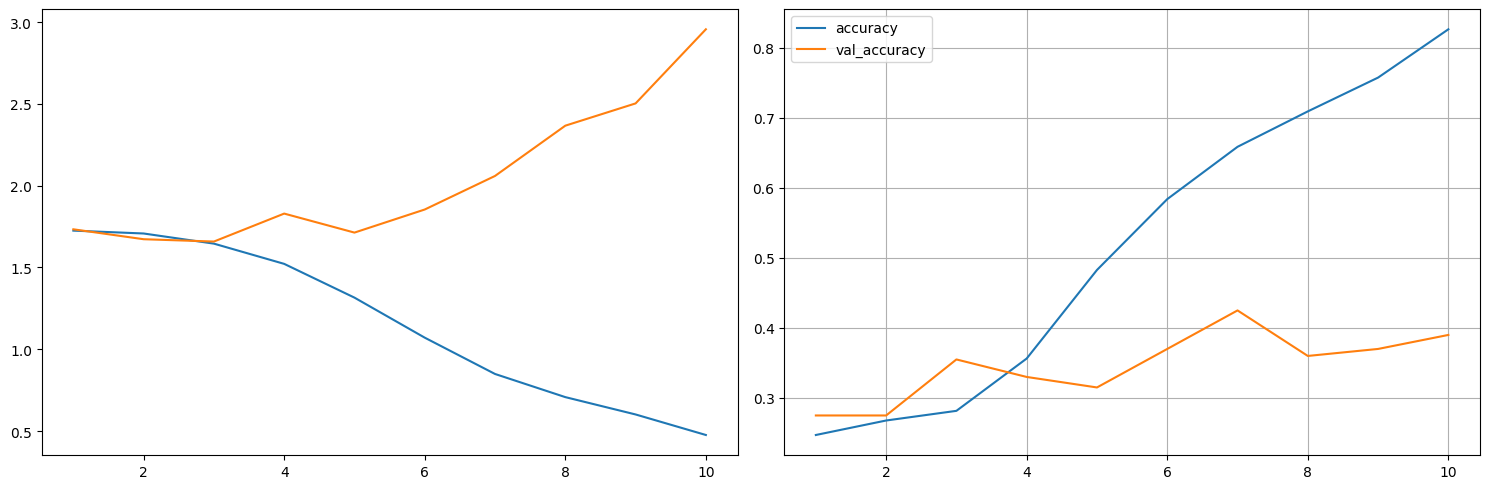

24/24 [==============================] - 5s 188ms/step
              precision    recall  f1-score   support

       anger       0.29      0.26      0.27        70
     disgust       0.19      0.21      0.20        90
        fear       0.16      0.12      0.14        40
   happiness       0.53      0.59      0.56       105
     sadness       0.14      0.13      0.14        45
    surprise       0.72      0.70      0.71       125

    accuracy                           0.42       475
   macro avg       0.34      0.34      0.34       475
weighted avg       0.41      0.42      0.41       475



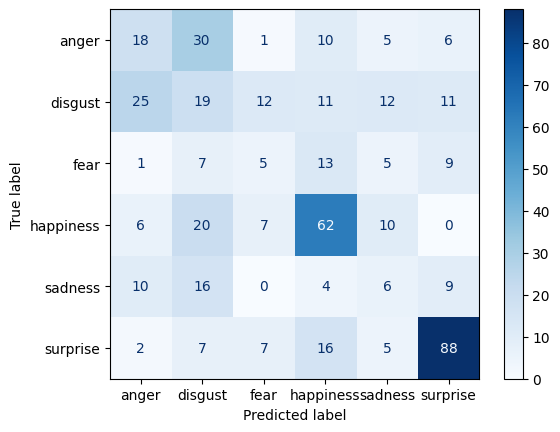

In [12]:
train_ds31 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds31 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir31 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization\TestSet'
test_generator31 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds31 = test_generator31.flow_from_directory(test_dir31, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_int_d1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_int_d1.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_aug_int_d1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_int_d1.fit(train_ds31, validation_data=val_ds31, epochs=epoch_number, callbacks=callback_list)
model_aug_int_d1.save("model_aug_int_1.h5")

y_true31 = test_ds31.classes
true_class31 = myClassType(y_true31)

# #predict the category with the input images from the test set
y_predict31 = model_aug_int_d1.predict(test_ds31)
classes_x31 = np.argmax(y_predict31, axis=1)
predicted_class31 = myClassType(classes_x31)

print(classification_report(true_class31, predicted_class31))
cf_model31 = confusion_matrix(true_class31, predicted_class31, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model31, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## CK_Augmented_IntensityNormalization dataset one (model_aug_int_d1)

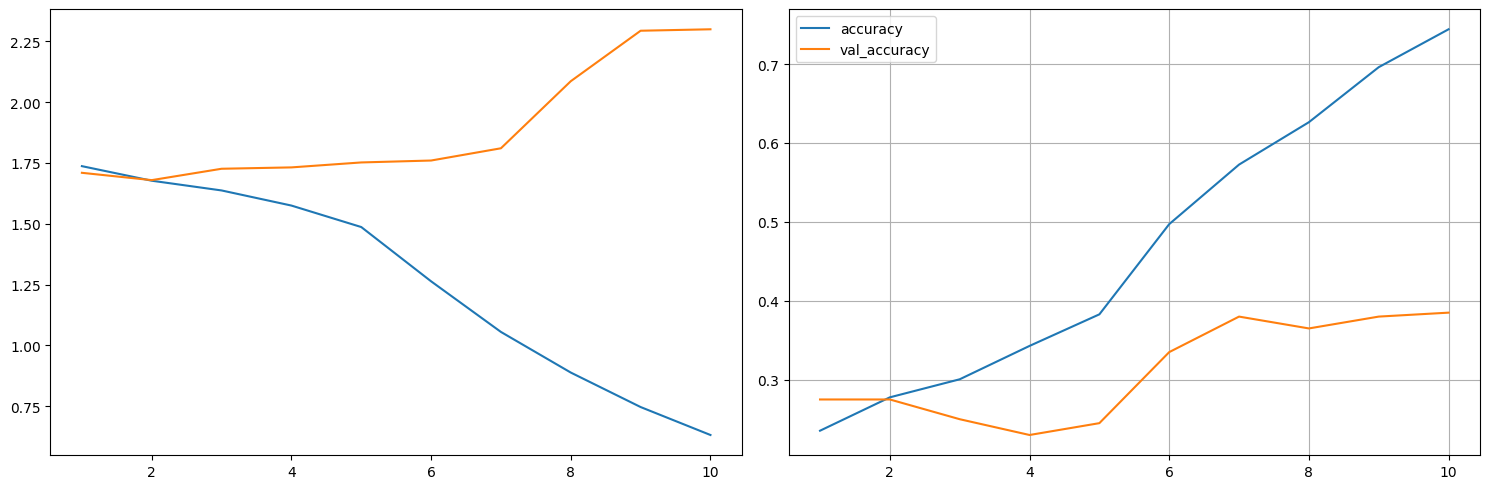

24/24 [==============================] - 4s 172ms/step
              precision    recall  f1-score   support

       anger       0.25      0.66      0.36        70
     disgust       0.28      0.11      0.16        90
        fear       0.00      0.00      0.00        40
   happiness       0.50      0.54      0.52       105
     sadness       0.20      0.13      0.16        45
    surprise       0.71      0.62      0.67       120

    accuracy                           0.41       470
   macro avg       0.32      0.34      0.31       470
weighted avg       0.40      0.41      0.39       470



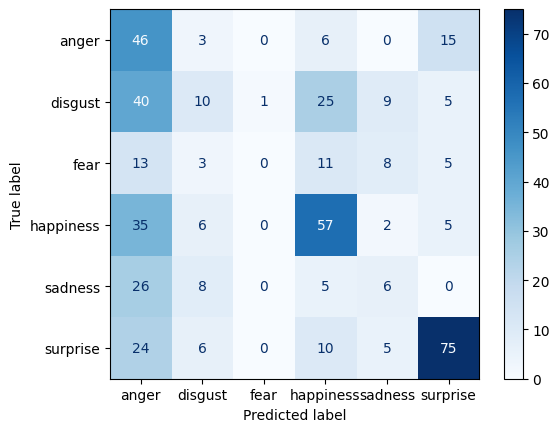

In [13]:
train_ds32 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization2\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds32 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization2\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir32 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization2\TestSet'
test_generator32 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds32 = test_generator32.flow_from_directory(test_dir32, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_int_d2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_int_d2.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_aug_int_d2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_int_d2.fit(train_ds32, validation_data=val_ds32, epochs=epoch_number, callbacks=callback_list)
model_aug_int_d2.save("model_aug_crop_2.h5")

y_true32 = test_ds32.classes
true_class32 = myClassType(y_true32)

# #predict the category with the input images from the test set
y_predict32 = model_aug_int_d2.predict(test_ds32)
classes_x32 = np.argmax(y_predict32, axis=1)
predicted_class32 = myClassType(classes_x32)

print(classification_report(true_class32, predicted_class32))
cf_model32 = confusion_matrix(true_class32, predicted_class32, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model32, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## CK_Augmented_IntensityNormalization dataset one (model_aug_int_d1)

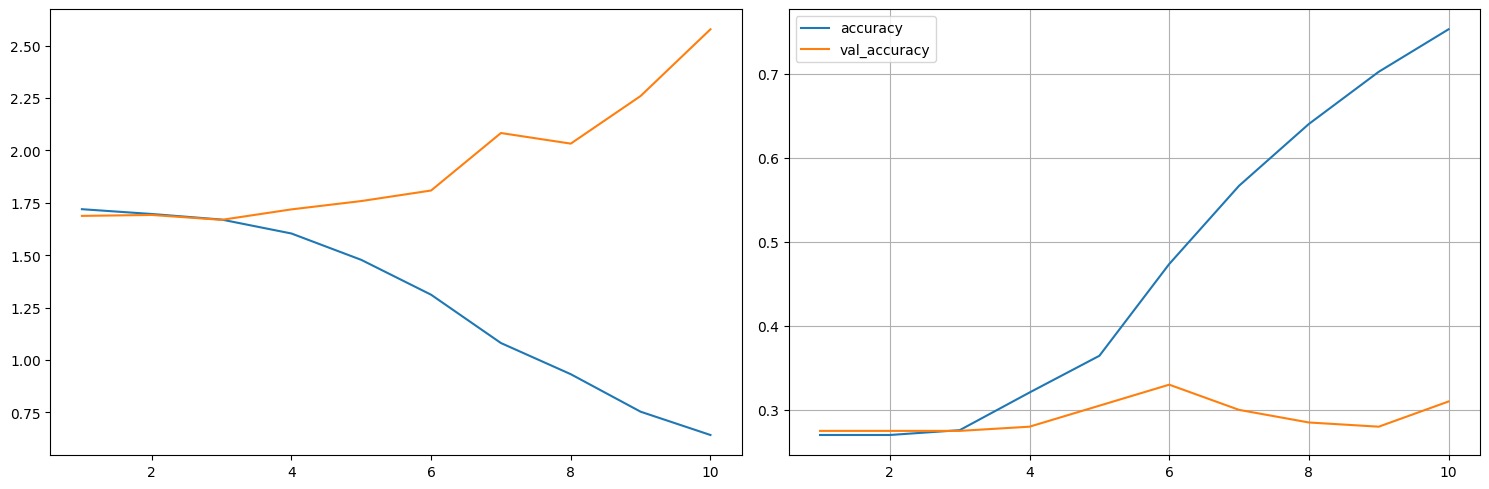

24/24 [==============================] - 5s 189ms/step
              precision    recall  f1-score   support

       anger       0.24      0.09      0.13        70
     disgust       0.28      0.53      0.37        90
        fear       0.00      0.00      0.00        40
   happiness       0.43      0.36      0.39       105
     sadness       0.27      0.38      0.31        45
    surprise       0.80      0.78      0.79       125

    accuracy                           0.43       475
   macro avg       0.33      0.36      0.33       475
weighted avg       0.42      0.43      0.41       475



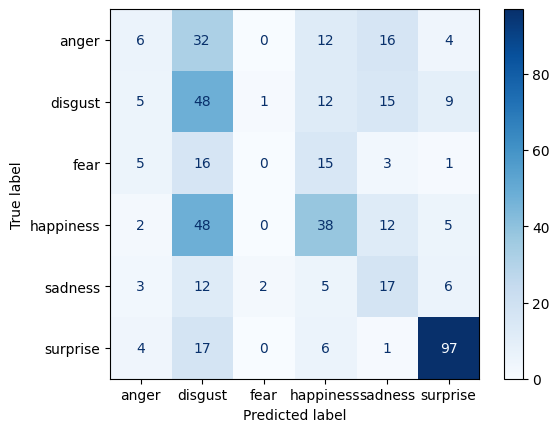

In [14]:
train_ds33 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization3\TrainSet', 
    image_size = (256,256),
    batch_size = 20 
)

val_ds33 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization3\ValSet', 
    image_size = (256,256), 
    batch_size = 20
)

#Fetch testing data from the dataset
test_dir33 = 'D:\Concordia\COMP473\COMP_473_Project\CK_Augmented_IntensityNormalization3\TestSet'
test_generator33 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds33 = test_generator33.flow_from_directory(test_dir33, target_size=(256,256), batch_size=20, shuffle = False)


model_aug_int_d3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Resizing(64, 64),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='valid', activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (7, 7), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")
])

# prints summary of our model.
model_aug_int_d3.summary()

# compile and fit the model3_t2
callback_list = [PlotTrain()]

model_aug_int_d3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model_aug_int_d3.fit(train_ds33, validation_data=val_ds33, epochs=epoch_number, callbacks=callback_list)
model_aug_int_d3.save("model_aug_crop_2.h5")

y_true33 = test_ds33.classes
true_class33 = myClassType(y_true33)

# #predict the category with the input images from the test set
y_predict33 = model_aug_int_d3.predict(test_ds33)
classes_x33 = np.argmax(y_predict33, axis=1)
predicted_class33 = myClassType(classes_x33)

print(classification_report(true_class33, predicted_class33))
cf_model33 = confusion_matrix(true_class33, predicted_class33, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model33, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)